In [19]:
# ranking results: linear regression works very well on young and almost well in VI failure. but better to
  #try other regression problems

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import Dataset.txt to cvs. remove the header, the first line. now importing to pandas
# defining the name of headers
data_cols=['WR','AR','w','h', 't1','t2','sh','Em','VM', 'TR', 'Young', 'EL1', 'Max_Pri_S', 'EL2', 'Max_S_HI' , 'EL3', 'Max_S_VI']
df = pd.read_csv('ALLX.csv', names=data_cols, header=0)
# drop redundent columns or series
#df.drop(['WR','w', 'h','t1', 't2','EL2', 'EL3'],axis=1, inplace=True)
#delet the negative rows by a for loop or preprocessing data
df = df[(df['Max_S_HI'] >= 0) & (df['Max_S_VI'] >= 0) & (df['Young'] >= 0) & (df['TR'] <= 2)&  (df['TR'] >= -2)& (df['Max_Pri_S'] >= 0)]
df = df[ (df['Max_Pri_S'] < 2) & (df['Max_S_HI'] < 2) & (df['Max_S_VI'] < 2) & (df['Young'] < 2)]
# drop dublicate rows
df = df.drop_duplicates()
# define the element number in brick
brick = [11,  12,  13,  14,  15,  16,  17,  18,  24,  25,  26,  27,  32,  33,  34,  35, 36,  37,  38,  39,  51,  52,  53,  54,  55,  56,  57,  58,  63,  64,  65,  66, 67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
# check if the brick fails by comparing the element number of max stress with brick elements numbers
Bfailure = df.EL1.isin(brick)
df['Bfailure']=Bfailure
#df = df[df.Bfailure]
#df.drop(['EL1'],axis=1, inplace=True)
# df.drop(['Bfailure'],axis=1, inplace=True)
# metal
df = df[ (df['Em'] == 0.5)]
# metal check if the sequence is correct First vertical interface faile, then horizental interface, and then brick
# VI fails first
FailSeq1 = ((df.Max_S_VI/df.Max_S_HI)>1) & ((df.Max_Pri_S/df.Max_S_VI)<2) & (Bfailure)
#brick fails first
Brick_first1 = ((df.Max_Pri_S/df.Max_S_HI)>2) & ((df.Max_Pri_S/df.Max_S_VI)>2) & (Bfailure)
# HI fails first
HI_first1 = ((df.Max_S_HI/df.Max_S_VI)>1) & ((df.Max_Pri_S/df.Max_S_HI)<2) & (Bfailure)
# check if the maximum stress in the composite happens in VI or HI
brick = [11,  12,  13,  14,  15,  16,  17,  18,  24,  25,  26,  27,  32,  33,  34,  35, 36,  37,  38,  39,  51,  52,  53,  54,  55,  56,  57,  58,  63,  64,  65,  66, 67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
HI = [1,   6,   7,   8,   9,  10,  19,  20,  21,  22,  23,  28,  29,  30,  31,  40, 41,  42,  43,  44,  49,  50,  59,  60,  61,  62,  83,  84,  85,  86,  87,  88, 89,  90,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108]
VI = [2,  3,  4,  5, 45, 46, 47, 48, 91, 92, 93, 94, 95, 96, 97, 98]
VI_first = df.EL1.isin(VI)
HI_first = df.EL1.isin(HI)
FailSeq = (VI_first) | (FailSeq1)
HI_first = (HI_first) | (HI_first1)
df['FailSeq']=FailSeq
df['Brick_first']=Brick_first1
df['HI_first']=HI_first
df.head()

# resilience and strength definition
df['resilience']= 1/df.Young
df['strength']= df.Max_S_VI
# updating strength column 
df.loc[(df['Brick_first'] == True) ,'strength'] = df.Max_Pri_S
df.loc[(df['HI_first'] == True) ,'strength'] = df.Max_S_HI
df[['FailSeq', 'Max_Pri_S','Max_S_HI', 'Max_S_VI', 'strength']]

# normilizing Max_S_VI to its minimum value (remember first normalize so min number becomes 1)
dfb = df[ (df['FailSeq'] == 1)]
df.Max_S_VI = df.Max_S_VI.divide(dfb.Max_S_VI.min())
df.Max_S_HI = df.Max_S_HI.divide(dfb.Max_S_VI.min())
df.Max_Pri_S = df.Max_Pri_S.divide(dfb.Max_S_VI.min())


#check the portion
#df.FailSeq.value_counts(normalize=True)
#df.Brick_first.value_counts(normalize=True)
#df.HI_first.value_counts(normalize=True)
df.FailSeq

744       True
746      False
747      False
748       True
750       True
751       True
752      False
753      False
754      False
755      False
756       True
757      False
758      False
760       True
761      False
762      False
764      False
765       True
766      False
767       True
770      False
772      False
773       True
774      False
776       True
777      False
778      False
779       True
780       True
783      False
         ...  
71735     True
71736     True
71737     True
71738     True
71739     True
71740     True
71741     True
71742     True
71743     True
71744     True
71745     True
71746     True
71747     True
71748     True
71749     True
71750     True
71751     True
71752     True
71753     True
71754     True
71755     True
71756     True
71757     True
71758     True
71759     True
71760     True
71761     True
71762     True
71763     True
71764     True
Name: FailSeq, Length: 30972, dtype: bool

In [20]:
df.shape

(30972, 23)

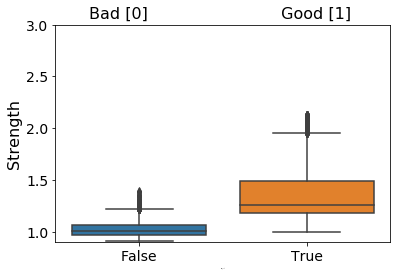

In [21]:
#bplot=sns.boxplot(y='Max_Pri_S', x='Brick_first',data=df)
#bplot=sns.boxplot(y='Max_S_HI', x='HI_first',data=df)
bplot=sns.boxplot(y='Max_S_VI', x='FailSeq',data=df)
plt.ylim(0.9, 3.0)
bplot.axes.set_title("Bad [0]                          Good [1] ", fontsize=16)
bplot.set_xlabel("Brick_first", fontsize=0)
bplot.set_ylabel("Strength",fontsize=16)
bplot.tick_params(labelsize=10)
bplot.tick_params(labelsize=14)

In [22]:
dfb.Max_S_VI.max()

1.40142369

,AR,sh,VM,TR
63406,2.0000,0.150000,0.14,-0.337242
1581,14.5865,0.039866,0.56,1.944107
46964,4.0000,0.100000,0.50,0.301030
31283,9.8715,0.387364,0.26,0.993595
4961,8.2504,0.123532,0.77,1.677209


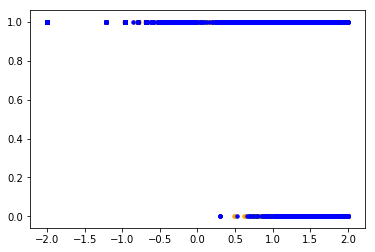

In [23]:
# ********************************
# Machine learning
# Specifying the features and Target

# before creating ML feature, we have to create a more complete data frame, 
#so after training we could compare and rank the FE results and ML results
feature_cols1=['AR', 'sh', 'VM', 'TR', 'Max_S_VI']
X_trn1 = df.loc[:,feature_cols1]  #used for regression
y_trn = df. FailSeq

y_trn = df. FailSeq

# scikit-learn has many tools and utilities for model selection
from sklearn.model_selection import train_test_split
tst_frac = 0.3  # Fraction of examples to sample for the test set
val_frac = 0.1  # Fraction of examples to sample for the validation set

# First, we use train_test_split to partition (X, y) into training and test sets
X_trn1, X_tst1, y_trn, y_tst = train_test_split(X_trn1, y_trn, test_size=tst_frac, random_state=42)

# Next, we use train_test_split to further partition (X_trn, y_trn) into training and validation sets
X_trn1, X_val1, y_trn, y_val = train_test_split(X_trn1, y_trn, test_size=val_frac, random_state=42)


# removing extra column from X_trn to make the feature for ML
feature_cols=['AR', 'TR']
X_trn = X_trn1.loc[:,feature_cols]
X_val = X_val1.loc[:,feature_cols]
X_tst = X_tst1.loc[:,feature_cols]
# Plot the three subsets
plt.figure()
plt.scatter(X_trn1.TR, y_trn, 12, marker='o', color='orange')
plt.scatter(X_val1.TR, y_val, 12, marker='o', color='green')
plt.scatter(X_tst1.TR, y_tst, 12, marker='o', color='blue')
X_trn1.head()


#Regression model
#Creating data set
df1 = df[(df['FailSeq'] == 1)]
# ********************************
# Machine learning
# Specifying the features and Target

# before creating ML feature, we have to create a more complete data frame, 
#so after training we could compare and rank the FE results and ML results
feature_cols2=['AR', 'sh', 'VM', 'TR']
X_trn1 = df1.loc[:,feature_cols2]  #used for regression
X_trn1.head()

#Regression model
#Creating data set
df1 = df[(df['FailSeq'] == 1)]
# ********************************
# Machine learning
# Specifying the features and Target

# before creating ML feature, we have to create a more complete data frame, 
#so after training we could compare and rank the FE results and ML results
feature_cols2=['AR', 'sh', 'VM', 'TR']
X_trn1 = df1.loc[:,feature_cols2]  #used for regression
y_trn1 = df1.Max_S_VI
y_trn2 = df1.Max_S_VI
# scikit-learn has many tools and utilities for model selection
from sklearn.model_selection import train_test_split
tst_frac = 0.3  # Fraction of examples to sample for the test set
val_frac = 0.1  # Fraction of examples to sample for the validation set

# First, we use train_test_split to partition (X, y) into training and test sets
X_trn1, X_tst1, y_trn1, y_tst1 = train_test_split(X_trn1, y_trn1, test_size=tst_frac, random_state=42)

# Next, we use train_test_split to further partition (X_trn, y_trn) into training and validation sets
X_trn1, X_val1, y_trn1, y_val1 = train_test_split(X_trn1, y_trn1, test_size=val_frac, random_state=42)
X_trn1.head()


In [25]:
data_cols=['AR','sh','VM', 'TR', 'Max_S_VI', 'SVR','R_FE', 'R_SVR']
FE_20 = pd.read_csv('TOP_FE.csv', names=data_cols, header=0)
SVR_20 = pd.read_csv('TOP_SVR.csv', names=data_cols, header=0)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


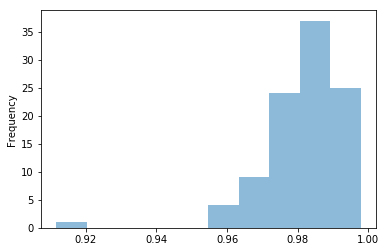

In [35]:
from scipy.stats import norm  
df_g = df[ (df['FailSeq'] == True)]

#df_g.Max_S_VI.plot(kind='hist', normed=False, color='k',alpha=0.2)
#FE_20.Max_S_VI.plot(kind='hist', normed=False,alpha=0.5)
SVR_20.Max_S_VI.plot(kind='hist', normed=False,alpha=0.5)


#range = np.arange(2.04, 2.13, 0.001)
#plt.plot(range, norm.pdf(range,0,1))

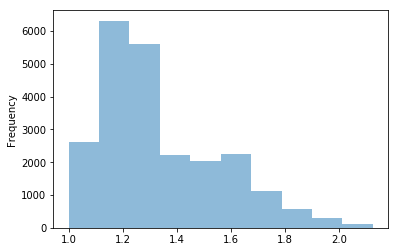

In [16]:
df_g.Max_S_VI.plot.hist(alpha=0.5)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


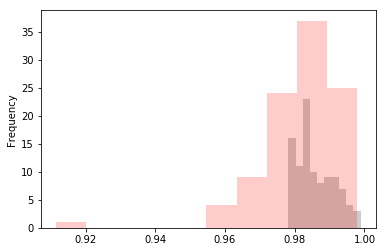

In [17]:
from scipy.stats import norm  
df_g = df[ (df['FailSeq'] == True)]

#df_g.sh.plot(kind='hist', normed=True)
FE_20.Max_S_VI.plot(kind='hist', normed=False,color='k',alpha=0.2)
SVR_20.Max_S_VI.plot(kind='hist', normed=False,color='r',alpha=0.2)


#range = np.arange(2.04, 2.13, 0.001)
#plt.plot(range, norm.pdf(range,0,1))

In [73]:
data.shape

(30972,)

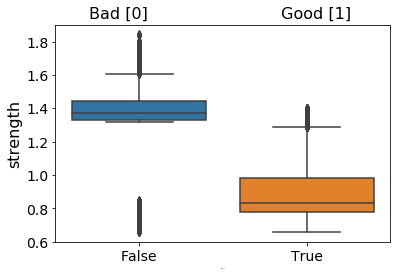

In [16]:
# Location of failure (element) in each failure mechanisms

brick = [11,  12,  13,  14,  15,  16,  17,  18,  24,  25,  26,  27,  32,  33,  34,  35, 36,  37,  38,  39,  51,  52,  53,  54,  55,  56,  57,  58,  63,  64,  65,  66, 67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
HI = [1,   6,   7,   8,   9,  10,  19,  20,  21,  22,  23,  28,  29,  30,  31,  40, 41,  42,  43,  44,  49,  50,  59,  60,  61,  62,  83,  84,  85,  86,  87,  88, 89,  90,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108]
VI = [2,  3,  4,  5, 45, 46, 47, 48, 91, 92, 93, 94, 95, 96, 97, 98]
df_HI_first= df[ (df['HI_first'] == True)]
df_HI_first.EL3.value_counts(normalize=True)

1     0.551636
16    0.281591
5     0.100064
15    0.066709
Name: EL3, dtype: float64

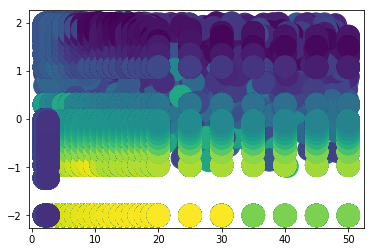

In [17]:
plt.scatter(df_VI_first.AR, df_VI_first.TR, c=df_VI_first.Max_S_VI, s=500)
plt.show()



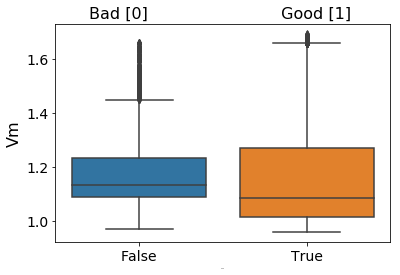

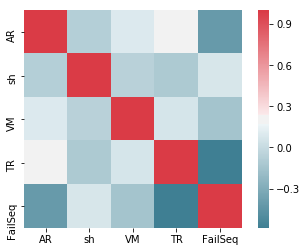

In [10]:
# heat map failure sequence
feature_cols1=['AR', 'sh', 'VM', 'TR', 'FailSeq']
X_trn = df.loc[:,feature_cols1]
import seaborn as sns
corr = X_trn.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)

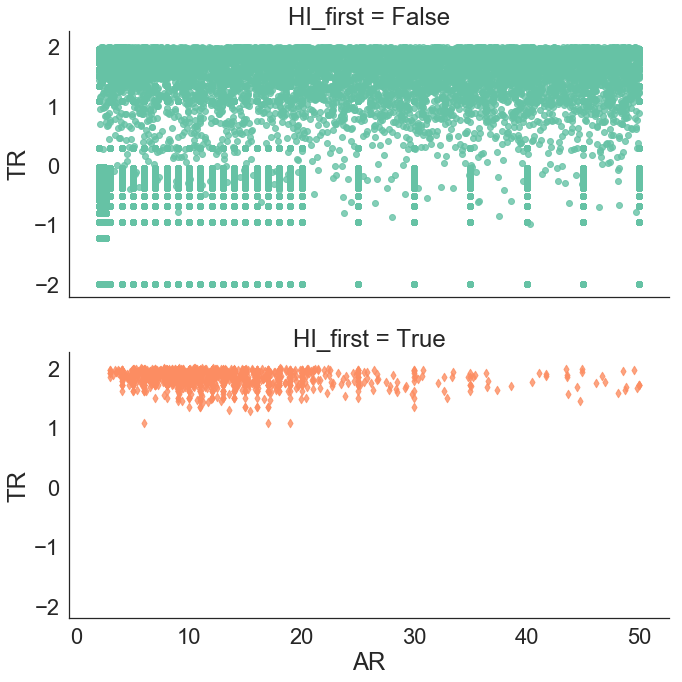

In [18]:
#sns.lmplot('AR', 'VM', df, hue='FailSeq',col="FailSeq", fit_reg=False, markers=["o", "x"])
sns.set_style("white")
#sns.lmplot('AR', 'TR', df, hue='FailSeq', fit_reg=False, markers=["o", "x"], aspect=2)
sns.lmplot('AR', 'TR', df, hue='HI_first',row="HI_first", fit_reg=False, markers=["o", "d"], aspect=2,palette="Set2")
fig = plt.gcf()
fig.set_size_inches(10, 10)
sns.set(font_scale=2) 
sns.set_style("white")



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda

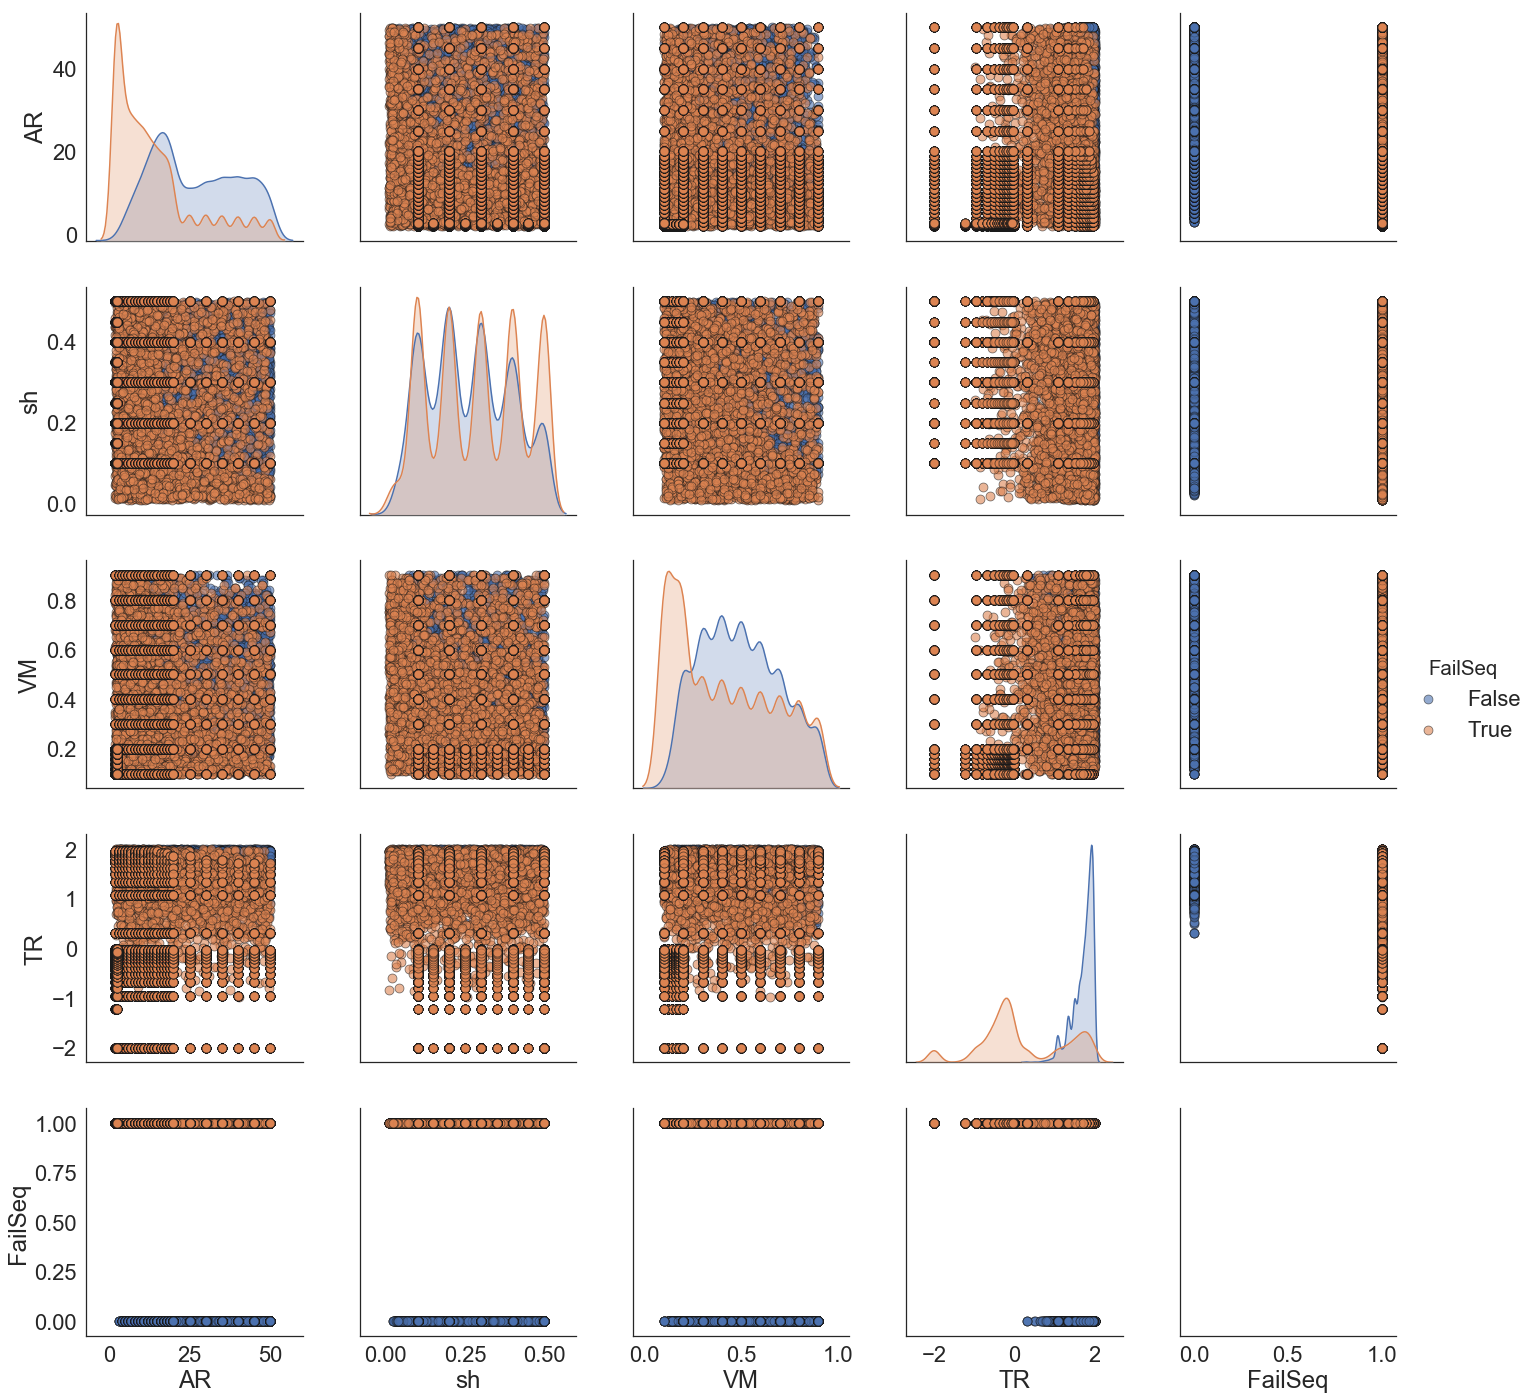

In [12]:
feature_cols1=['AR', 'sh', 'VM', 'TR', 'FailSeq']
X_trn3 = df.loc[:,feature_cols1]
sns.pairplot(X_trn3, hue = 'FailSeq', diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},size = 4)

In [13]:
# plotting the violinplot
feature_cols1=['AR', 'sh', 'VM', 'TR', 'Young']
X_trn2 = df.loc[:,feature_cols1]
sns.violinplot(x="feature_cols1",y="AR", hue="FailSeq", data=df);
plt.show()


ValueError: Could not interpret input 'feature_cols1'

In [ ]:
# ********************************
# Machine learning
# Specifying the features and Target

# before creating ML feature, we have to create a more complete data frame, 
#so after training we could compare and rank the FE results and ML results
feature_cols1=['AR', 'sh', 'VM', 'TR', 'Young']
X_trn1 = df.loc[:,feature_cols1]
y_trn = df.Young

# scikit-learn has many tools and utilities for model selection
from sklearn.model_selection import train_test_split
tst_frac = 0.3  # Fraction of examples to sample for the test set
val_frac = 0.1  # Fraction of examples to sample for the validation set

# First, we use train_test_split to partition (X, y) into training and test sets
X_trn1, X_tst1, y_trn, y_tst = train_test_split(X_trn1, y_trn, test_size=tst_frac, random_state=42)

# Next, we use train_test_split to further partition (X_trn, y_trn) into training and validation sets
X_trn1, X_val1, y_trn, y_val = train_test_split(X_trn1, y_trn, test_size=val_frac, random_state=42)


# removing extra column from X_trn to make the feature for ML
feature_cols=['AR', 'sh', 'VM', 'TR']
X_trn = X_trn1.loc[:,feature_cols]
X_val = X_val1.loc[:,feature_cols]
X_tst = X_tst1.loc[:,feature_cols]
# for ranking and comparing the final results of FE and ML
df_trn= X_trn1
df_trn['y'] = y_trn
df_tst= X_tst1
df_tst['y'] = y_tst
# Plot the three subsets
plt.figure()
plt.scatter(X_trn1.TR, y_trn, 12, marker='o', color='orange')
plt.scatter(X_val1.TR, y_val, 12, marker='o', color='green')
plt.scatter(X_tst1.TR, y_tst, 12, marker='o', color='blue')

In [ ]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression(normalize=False).fit(X_trn, y_trn)
y_pred_linear_train = linear_reg.predict(X_trn)
y_pred_linear_tst = linear_reg.predict(X_tst)

In [ ]:
# Plot outputs
print('score is  '+str(linear_reg.score(X_tst, y_tst)))
plt.scatter(X_tst.AR, y_tst,  color='black')
plt.plot(X_tst.AR, y_pred_linear_tst, 'og')
plt.show()

In [ ]:
plt.figure()
plt.plot(y_trn,y_pred_linear_train,'ro')
plt.xlabel('FEM rank')
plt.ylabel('ML rank')
plt.title('Training data')
plt.figure()
plt.plot(y_tst,y_pred_linear_tst,'ro')
plt.xlabel('FEM rank')
plt.ylabel('ML rank')
plt.title('Training data')

In [ ]:
# SVR Support Vector Regression (SVR) using linear and non-linear kernels
import numpy as np
from sklearn.svm import SVR

# #############################################################################
# Fit regression model
#svr_rbf = SVR(kernel='rbf', C=100, gamma='auto').fit(X_trn, y_trn)
svr_lin = SVR(kernel='linear', C=100, gamma='auto').fit(X_trn, y_trn)
#svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,coef0=1).fit(X_trn, y_trn)

# #############################################################################
score = svr_lin.score(X_tst,y_tst)
#score['NB'] = svr_lin.score(X_tst,y_tst)
#score['RF'] = svr_poly.score(X_tst,y_tst)
print('score is: ', score)

In [ ]:
from sklearn.linear_model import LinearRegression
y_pred_linear_train = svr_rbf.predict(X_trn)
y_pred_linear_tst = svr_rbf.predict(X_tst)

In [ ]:
plt.figure()
plt.plot(y_trn,y_pred_linear_train,'ro')
plt.xlabel('FEM rank')
plt.ylabel('ML rank')
plt.title('Training data')
plt.figure()
plt.plot(y_tst,y_pred_linear_tst,'ro')
plt.xlabel('FEM rank')
plt.ylabel('ML rank')
plt.title('Training data')

In [ ]:
# how to plot TRvalue for 1 and o, what the pandas video ali's, probably gussian distribution
import matplotlib.pyplot as plt
import pandas
data = df[(df['FailSeq'] == 1)]
data2 = df[(df['FailSeq'] == 0)]
fig, ax = plt.subplots()
data['TR'].value_counts().plot(ax=ax, kind='bar')
plt.show()

In [ ]:
# import the seaborn module
import seaborn as sns
# import the matplotlib module
import matplotlib.pyplot as plt
# set the background colour of the plot to white
sns.set(style="whitegrid", color_codes=True)
# setting the plot size for all plots
sns.set(rc={'figure.figsize':(11.7,8.27)})
# create a countplot
sns.countplot('TR',data=df,hue = 'FailSeq')
# Remove the top and down margin
sns.despine(offset=10, trim=True)
# display the plotplt.show()

# plotting the violinplot
sns.violinplot(x="FailSeq",y="AR", hue="FailSeq", data=df);
plt.show()

# heat map all 
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)

# heat map failure sequence
feature_cols1=['AR', 'sh', 'VM', 'TR', 'FailSeq']
X_trn = df.loc[:,feature_cols1]
import seaborn as sns
corr = X_trn.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)

# Strength of good and bad design comparison

# resilience of good and bad design comparison